## Time series concepts
**Components of time series data**
1. **Trend**: Trend represents the long-term movement or directionality of the data over time. It captures the overall tendency of the series to increase, decrease, or remain stable. Trends can be linear, indicating a consistent increase or decrease, or nonlinear, showing more complex patterns.
2. **Seasonality**: Seasonality refers to periodic fluctuations or patterns that occur at regular intervals within the time series. These cycles often repeat annually, quarterly, monthly, or weekly and are typically influenced by factors such as seasons, holidays, or business cycles.
3. **Cyclic variations**: Cyclical variations are longer-term fluctuations in the time series that do not have a fixed period like seasonality. These fluctuations represent economic or business cycles, which can extend over multiple years and are often associated with expansions and contractions in economic activity.
4. **Irregularity** (or Noise): Irregularity, also known as noise or randomness, refers to the unpredictable or random fluctuations in the data that cannot be attributed to the trend, seasonality, or cyclical variations. These fluctuations may result from random events, measurement errors, or other unforeseen factors. Irregularity makes it challenging to identify and model the underlying patterns in the time series data.

### Time series Visualization
Different Time series visualization graphs
1. Line Plots: Line plots display data points over time, allowing easy observation of trends, cycles, and fluctuations.
2. Seasonal Plots: These plots break down time series data into seasonal components, helping to visualize patterns within specific time periods.
3. Histograms and Density Plots: Shows the distribution of data values over time, providing insights into data characteristics such as skewness and kurtosis.
4. Autocorrelation and Partial Autocorrelation Plots: These plots visualize correlation between a time series and its lagged values, helping to identify seasonality and lagged relationships.
5. Spectral Analysis: Spectral analysis techniques, such as periodograms and spectrograms, visualize frequency components within time series data, useful for identifying periodicity and cyclical patterns.
6. Decomposition Plots: Decomposition plots break down a time series into its trend, seasonal, and residual components, aiding in understanding the underlying patterns


#### Seasonality
**Seasonality** in time series is recurring and regular patterns at a set interval, which is caused by weather, holidays or business cycles. Ice cream sales usually reach their peak during summer and decrease during winter. Seasonality can happen at any time interval, for instance, daily, weekly or yearly, and can have patterns such as increased weekend sales. Determining these regular patterns is necessary for precise time series forecasting
Why to Detect Seasonality in Time Series Data?

There are certain specific reasons that are discussed below:

- **Pattern Detection**: Identifying seasonality aids analysts in detecting repeating patterns, enhancing data interpretation and future prediction.
- **Forecasting**: Proper identification of seasonal trends assists in the development of stable forecasting models, resulting in better predictions.
- **Anomaly Detection**: Understanding the seasonal behavior of data allows us to spot anomalies that deviate from expected seasonal trends, signaling important events.
- **Optimized Decision-Making**: Recognizing seasonality allows organizations to optimize resources, adjust inventory and fine-tune strategies based on seasonal demands.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

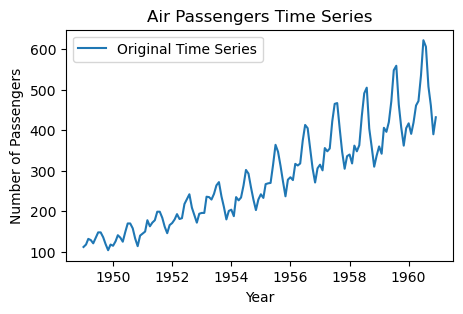

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

# Plot the original time series data
plt.figure(figsize=(5, 3))
plt.plot(data, label='Original Time Series')
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

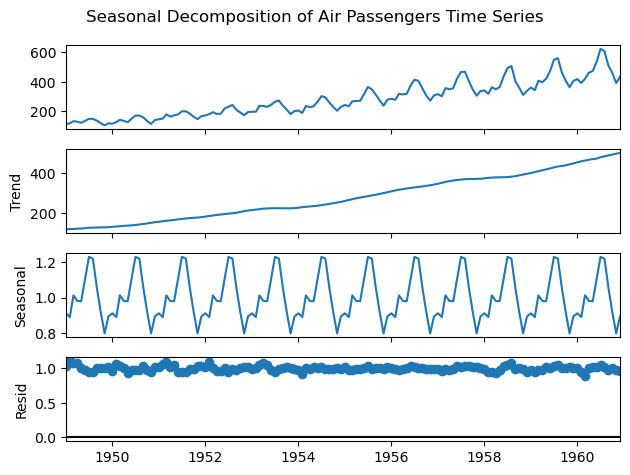

In [3]:
# Decompose the time series into trend, seasonal and residual components
result = seasonal_decompose(
    data, model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.suptitle('Seasonal Decomposition of Air Passengers Time Series')
plt.tight_layout()
plt.show()

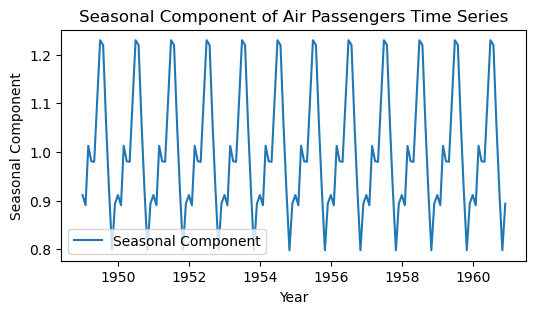

In [4]:
# Plot the seasonal component
plt.figure(figsize=(6, 3))
plt.plot(result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

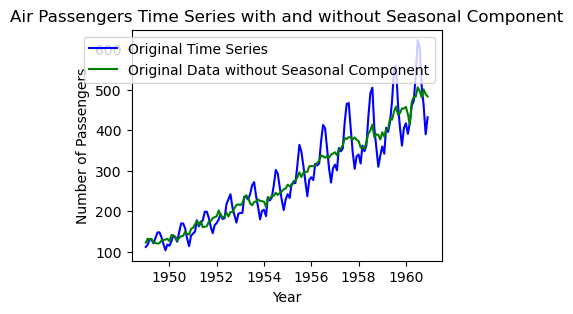

In [5]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(4, 3))

# Plot the original time series data
plt.plot(data, label='Original Time Series', color='blue')
data_without_seasonal = data['#Passengers'] / result.seasonal

# Plot the original data without the seasonal component
plt.plot(data_without_seasonal,
         label='Original Data without Seasonal Component', color='green')
plt.title('Air Passengers Time Series with and without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

Applying the Augmented Dickey-Fuller (ADF) Test

Once we have eliminated the seasonality from our data, we have to test if the data series has turned stationary. One such method of testing stationarity is by applying the Augmented Dickey-Fuller (ADF) test. The ADF test is used to ascertain if a time series is stationary by conducting a test for the null hypothesis that the series contains a unit root (or is non-stationary).

In [6]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data_without_seasonal)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
#Interpreting the results
if adf_result[1] < 0.05 : print("The data is stationary (p-value < 0.05).")
else:
    print("The data is not stationary (p-value >= 0.05).")

ADF Statistic: 1.1415289777074222
p-value: 0.9955559262862962
The data is not stationary (p-value >= 0.05).


In [7]:
data_diff = data_without_seasonal.diff().dropna()
adf_result = adfuller(data_diff)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -2.9058136872756233
p-value: 0.044676109541125664


After removing the seasonal component, the Augmented Dickey-Fuller (ADF) test initially showed that the data was not stationary, with a p-value of 0.9955. However, after applying differencing (removing the trend), the p-value dropped to 0.0447, indicating that the data is now stationary. This confirms that differencing effectively addressed the trend, making the time-series data suitable for further analysis and forecasting model training.

Visualizing after differencing the data:

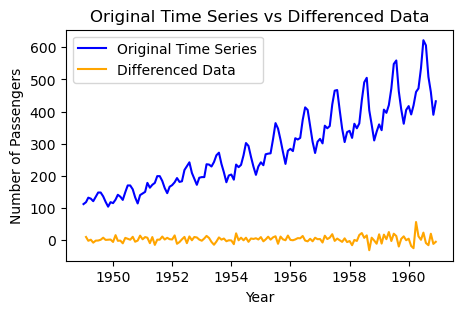

In [8]:
plt.figure(figsize=(5, 3))
plt.plot(data, label='Original Time Series', color='blue')
plt.plot(data_diff, label='Differenced Data', color='orange')
plt.title('Original Time Series vs Differenced Data')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## Time Series Decomposition 
Time series data consists of observations taken at consecutive points in time. These data can often be decomposed into multiple components to better understand the underlying patterns and trends. Time series decomposition is the process of separating a time series into its constituent components, such as trend, seasonality, and noise..

Time series decomposition helps us break down a time series dataset into three main components:
- Trend: The trend component represents the long-term movement in the data, representing the underlying pattern.
- Seasonality: The seasonality component represents the repeating, short-term fluctuations caused by factors like seasons or cycles.
- Residual (Noise): The residual component represents random variability that remains after removing the trend and seasonality.

By separating these components, we can gain insights into the behavior of the data and make better forecasts.
### Types of Time Series Decomposition Techniques

##### Additive Decomposition:
- In additive decomposition, the time series is expressed as the sum of its components:$Y(t)=Trend(t)+Seasonal(t)+Residual(t)Y(t)=Trend(t)+Seasonal(t)+Residual(t)$
- It's suitable when the magnitude of seasonality doesn't vary with the magnitude of the time series.

##### Multiplicative Decomposition:
- In multiplicative decomposition, the time series is expressed as the product of its components:$ Y(t)=Trend(t)∗Seasonal(t)∗Residual(t)Y(t)=Trend(t)∗Seasonal(t)∗Residual(t)$
- It's suitable when the magnitude of seasonality scales with the magnitude of the time series.

#### Methods of Decomposition
##### Moving Averages:
- Moving averages involve calculating the average of a certain number of past data points.
- It helps smooth out fluctuations and highlight trends.

##### Seasonal Decomposition of Time Series
- The Seasonal and Trend decomposition using Loess (STL) is a popular method for decomposition, which uses a combination of local regression (Loess) to extract the trend and seasonality components.

##### Exponential Smoothing State Space Model
- This method involves using the ETS framework to estimate the trend and seasonal components in a time series.

##### Create a Synthetic Time Series Dataset
The following generates a synthetic time series dataset (ts) with daily data points that combine a sine wave pattern and random noise, simulating a time series with some underlying periodic behavior and variability. The time series spans one year, from $"2021-01-01"$ to the end of the year. The random seed is set to ensure reproducibility. 

In [9]:
np.random.seed(0)
date_rng = pd.date_range(start="2021-01-01", periods=365, freq="D")
data = np.sin(np.arange(365) * 2 * np.pi / 365) + np.random.normal(0, 0.5, 365)
ts = pd.Series(data, index=date_rng)
ts

2021-01-01    0.882026
2021-01-02    0.217292
2021-01-03    0.523791
2021-01-04    1.172066
2021-01-05    1.002581
                ...   
2021-12-27    0.263264
2021-12-28   -0.066917
2021-12-29    0.414305
2021-12-30    0.135561
2021-12-31   -0.025054
Freq: D, Length: 365, dtype: float64

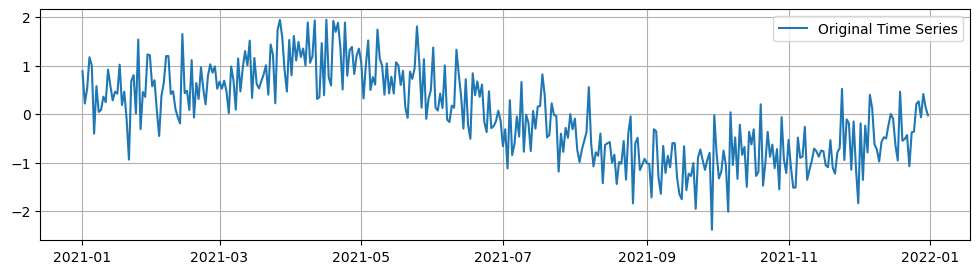

In [10]:
plt.figure(figsize=(12, 3))
plt.plot(ts, label='Original Time Series')
plt.legend()
plt.grid('on')

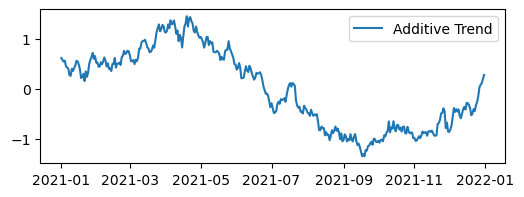

In [11]:
# additive decomposition
result_add = seasonal_decompose(ts, model='additive', extrapolate_trend='freq')
plt.figure(figsize=(6, 2))
plt.plot(result_add.trend, label='Additive Trend')
plt.legend()

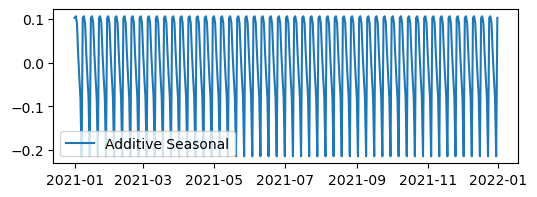

In [12]:
plt.figure(figsize=(6, 2))

plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend()
plt.show()

In [13]:
sma_window = 7  # 7-day moving average
sma = ts.rolling(window=sma_window).mean()
sma

2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04         NaN
2021-01-05         NaN
                ...   
2021-12-27   -0.326866
2021-12-28   -0.262944
2021-12-29   -0.142060
2021-12-30    0.030998
2021-12-31    0.081171
Freq: D, Length: 365, dtype: float64

In [14]:
ema_window = 30  # 30-day moving average
ema = ts.ewm(span=ema_window, adjust=False).mean()
ema

2021-01-01    0.882026
2021-01-02    0.839140
2021-01-03    0.818795
2021-01-04    0.841587
2021-01-05    0.851973
                ...   
2021-12-27   -0.428505
2021-12-28   -0.405176
2021-12-29   -0.352307
2021-12-30   -0.320831
2021-12-31   -0.301749
Freq: D, Length: 365, dtype: float64

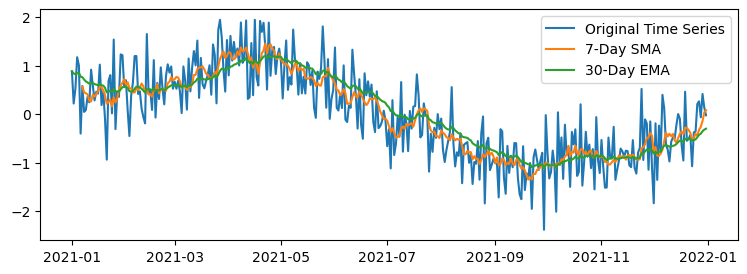

In [15]:
plt.figure(figsize=(9, 3))
plt.plot(ts, label='Original Time Series')
plt.plot(sma, label=f'{sma_window}-Day SMA')
plt.plot(ema, label=f'{ema_window}-Day EMA')
plt.legend()

#### Preprocessing Time Series Data

Time series preprocessing refers to the steps taken to clean, transform, and prepare time series data for analysis or forecasting. It involves techniques aimed at improving data quality, removing noise, handling missing values, and making the data suitable for modeling. Preprocessing tasks may include removing outliers, handling missing values through imputation, scaling or normalizing the data, detrending, deseasonalizing, and applying transformations to stabilize variance. The goal is to ensure that the time series data is in a suitable format for subsequent analysis or modeling.
- Handling Missing Values 
- Dealing with Outliers
- Stationarity and Transformation: Ensuring that the statistical properties of the time series, such as mean and variance, remain constant over time. Techniques like differencing, detrending, and deseasonalizing are used to achieve stationarity.

### Time Series Preprocessing Techniques
- Stationarity
- Differencing
- Detrending
- Deseasonalizing
- Moving Average
- Exponential Moving Average
- Missing Value Imputation
- Outlier Detection and Removal
- Time Alignment
- Data Transformation
- Scaling
- Normalization

##### Stationarity
This can be done by splitting into groups and calculate mean and variance for each group.

##### Augmented Dickey-Fuller test
This is a statistical test that is dedicatedly built to test whether univariate time series data is stationary or not. This test is based on a hypothesis and can tell us the degree of probability to which it can be accepted. It is often classified under one of the unit root tests, It determines how strongly, a univariate time series data follows a trend. Let's define the null and alternate hypotheses,
- Ho (Null Hypothesis): The time series data is non-stationary
- H1 (alternate Hypothesis): The time series data is stationary

Assume alpha $= 0.05$, meaning ($95%$ confidence). The test results are interpreted with a p-value if $p > 0.05$ fails to reject the null hypothesis, else if $p <= 0.05$ reject the null hypothesis.

##### Seasonal Adjustment and Differencing
Decomposing Time Series

Seasonality in time series can be represented by breaking it down into a trend component, a seasonal component, and an irregular component. There are several methods to decompose a time series into its trend, seasonal, and residual components. The most common approach is Additive Decomposition.
Additive Decomposition
$Y_t=T_t+S_t+E_t​$

The additive decomposition assumes that the effects of trend, seasonality, and residuals are separate and non-interacting. The observed value at any given time is the sum of these three components. This model is appropriate when the impact of each component on the total value is considered to be independent and straightforwardly additive.

Trend Estimation
- moving average
- exponential smoothing
Compute the detrended series and calculate seasonal components and residuals

Seasonal differencing
- first order differencing
- higher order differencing

Differentiating is crucial for a number of reasons.
- The assumption of stationarity is a fundamental feature of many statistical models, including autoregressive and ARIMA models. Differencing is appropriate for these models since it can convert a non-stationary series into a stationary one.
- Forecasting Accuracy: By eliminating autocorrelation—the association between values in a time series at various lags—differencing may increase the precision of forecasting models. Distancing aids in mitigating the forecasting bias that autocorrelation may cause.
- Trend and Cycle Analysis: By eliminating short-term changes from a time series, differencing may assist in identifying patterns and cycles. In the analysis of economic data, where seasonal and irregular variables might obscure underlying patterns, this can be very helpful.



In [16]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

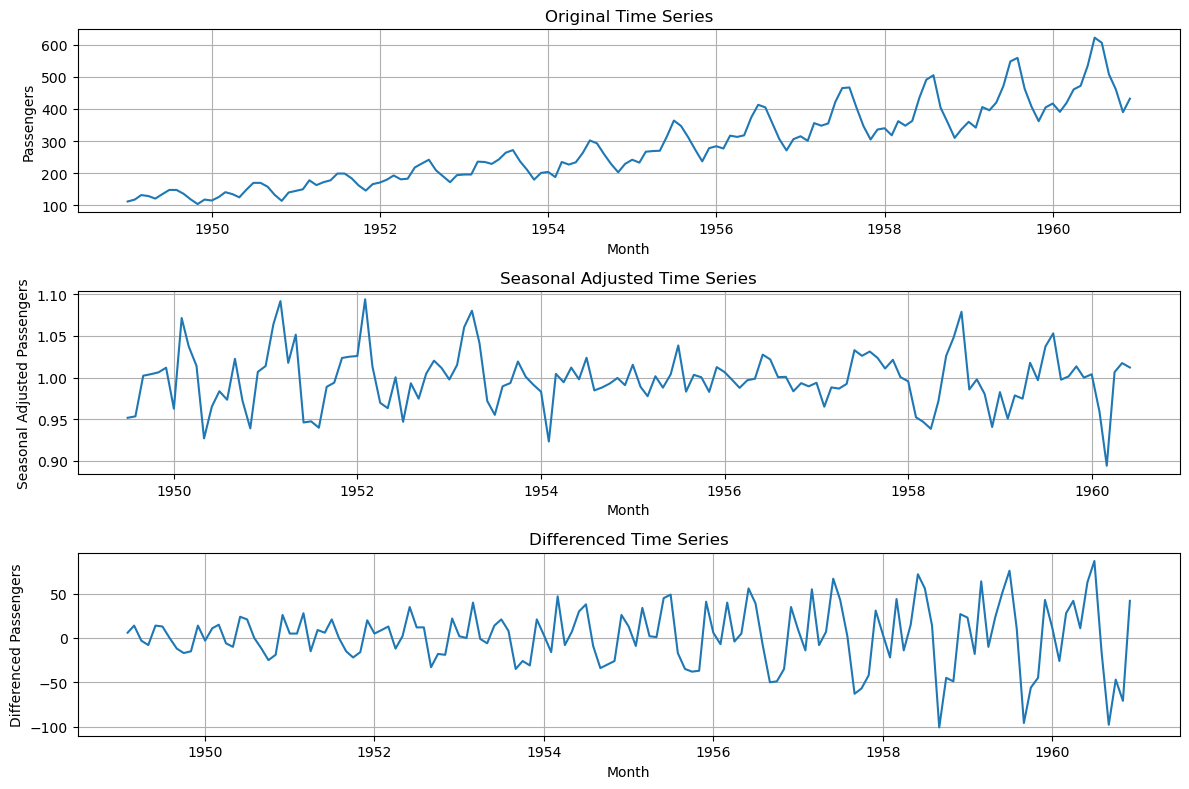

In [17]:
# Seasonal adjustment
result = sm.tsa.seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
df['Seasonal_Adjusted'] = result.resid
# Differencing
df['Differenced'] = df['Passengers'].diff()
# Visualize the results
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(3, 1, 1)
plt.plot(df['Passengers'])
plt.title('Original Time Series')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.grid()

# Seasonal Adjusted
plt.subplot(3, 1, 2)
plt.plot(df['Seasonal_Adjusted'])
plt.title('Seasonal Adjusted Time Series')
plt.xlabel('Month')
plt.ylabel('Seasonal Adjusted Passengers')
plt.grid()

# Differenced
plt.subplot(3, 1, 3)
plt.plot(df['Differenced'])
plt.title('Differenced Time Series')
plt.xlabel('Month')
plt.ylabel('Differenced Passengers')
plt.grid()
plt.tight_layout()

plt.show()


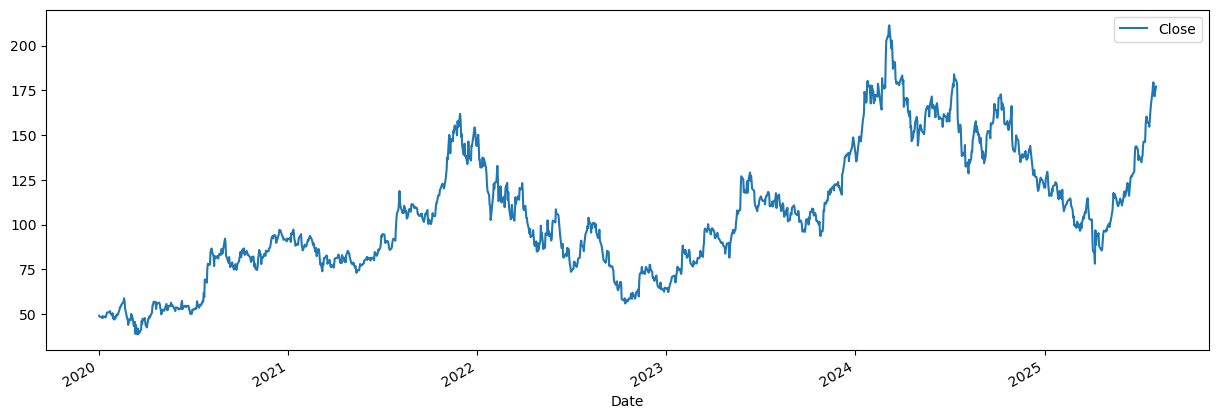

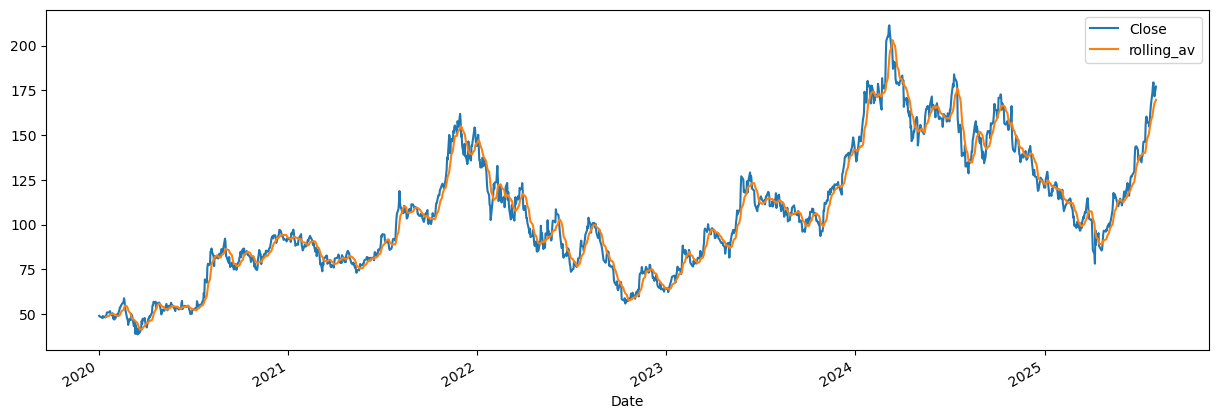

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 15, 5
AMD = yf.Ticker("AMD")

# getting the historical market data
AMD_values = AMD.history(start="2020-01-01")

# Plotting the close price of AMD
AMD_values[['Close']].plot();
AMD_values['rolling_av'] = AMD_values['Close'].rolling(10).mean()

# plotting 10-day rolling average value with the closing value
AMD_values[['Close','rolling_av']].plot();

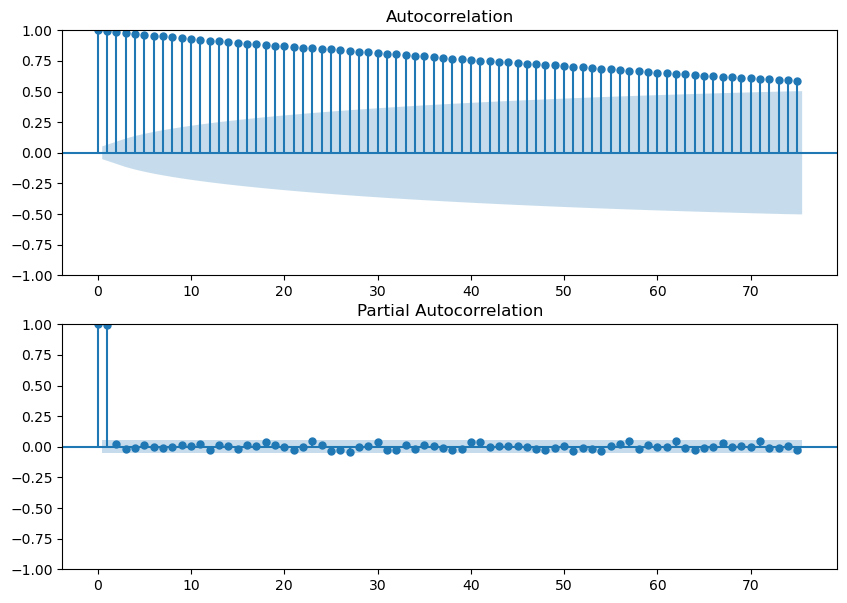

In [19]:
# Function to plot ACF and PACF
def plot_acf_pacf(timeseries):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    plot_acf(timeseries, ax=ax1, lags=75)
    plot_pacf(timeseries, ax=ax2, lags=75)
    plt.show()


# Plotting ACF and PACF of the closing value time series
plot_acf_pacf(AMD_values['Close'])

Here, we can see in the ACF plot that the first lag has a correlation of 1 since is the same error term as that of the current time series but from the second lag we can see that the ACF plot is reducing but the correlation value between the lags decreases slowly, here if we model more lag values, we'll find out the order of q gets more than 50.

The blue region signifies where the values are no longer statistically significant. From the above plot, we can that see that the last significant lag is the 55. Therefore, our model order for the MA model will be 55. The value of q to be 55 which means the current value will depend on the last 55 error values of the data.
##### Fitting the MA Model and Checking for Statistical Appropriation:

In the next step we will be fitting an ARIMA model to the closing prices of AMD stock with an order of (0, 0, 55), indicating 55 lags for the moving average component or the order of the moving average model to be 55. After that we will be printing the summary of the fitted ARIMA model such that the coefficient of the past noise values could be analyzed.

In [20]:
#creating the model
MA_model = ARIMA(endog=AMD_values['Close'], order=(0, 0, 55))

#fitting data to the model
results = MA_model.fit()

#summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1404
Model:                ARIMA(0, 0, 55)   Log Likelihood               -4571.737
Date:                Mon, 04 Aug 2025   AIC                           9257.473
Time:                        18:12:03   BIC                           9556.557
Sample:                             0   HQIC                          9369.261
                               - 1404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.1007      7.656     13.728      0.000      90.095     120.106
ma.L1          1.2629      0.028     44.523      0.000       1.207       1.318
ma.L2          1.3239      0.045     29.748      0.0

In [21]:
#prediction data
start_date = '2023-12-15'
end_date   = '2024-02-05'
AMD_values['prediction'] = results.predict(start=start_date, end=end_date)

#printing last 14 values of the prediction with original and rolling avg value
print(AMD_values[['Close','rolling_av','prediction']].tail(14))

                                Close  rolling_av  prediction
Date                                                         
2025-07-16 00:00:00-04:00  160.080002  143.997003         NaN
2025-07-17 00:00:00-04:00  160.410004  146.186003         NaN
2025-07-18 00:00:00-04:00  156.990005  148.094003         NaN
2025-07-21 00:00:00-04:00  157.000000  150.314003         NaN
2025-07-22 00:00:00-04:00  154.720001  152.004002         NaN
2025-07-23 00:00:00-04:00  158.649994  154.028001         NaN
2025-07-24 00:00:00-04:00  162.119995  155.824001         NaN
2025-07-25 00:00:00-04:00  166.470001  157.829001         NaN
2025-07-28 00:00:00-04:00  173.660004  160.571001         NaN
2025-07-29 00:00:00-04:00  177.440002  162.754001         NaN
2025-07-30 00:00:00-04:00  179.509995  164.697000         NaN
2025-07-31 00:00:00-04:00  176.309998  166.287000         NaN
2025-08-01 00:00:00-04:00  171.699997  167.757999         NaN
2025-08-04 00:00:00-04:00  177.145004  169.772499         NaN


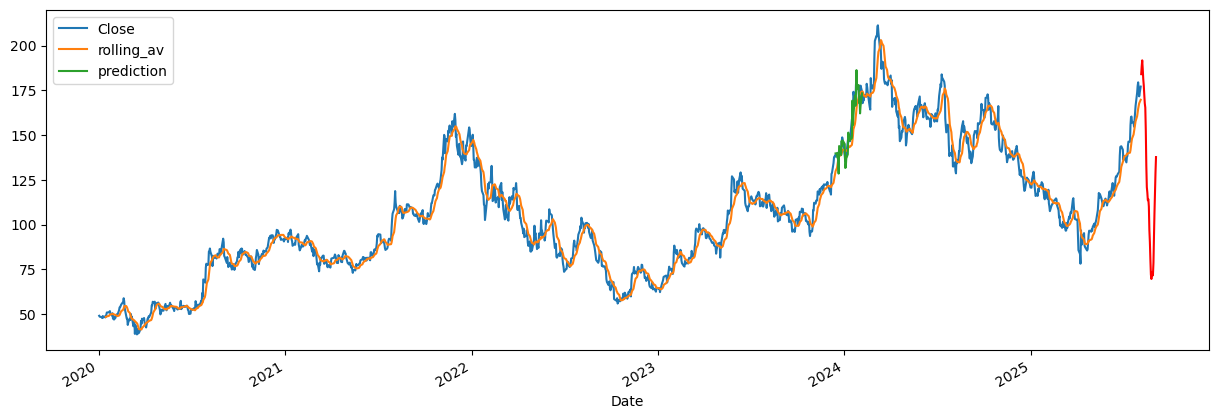

In [23]:
# Forecast future values
# Forecast future closing prices
forecast_steps = 30  # Forecasting for the next 30 days
forecast_index = pd.date_range(start=AMD_values['Close'].index[-1], periods=forecast_steps+1, freq='D')[1:]  # Generate datetime index for forecast
forecast = results.forecast(steps=forecast_steps)

# plotting the end results
AMD_values[['Close','rolling_av','prediction']].plot()
plt.plot(forecast_index, forecast, color='red', label='Forecast')

##### Exponential moving average

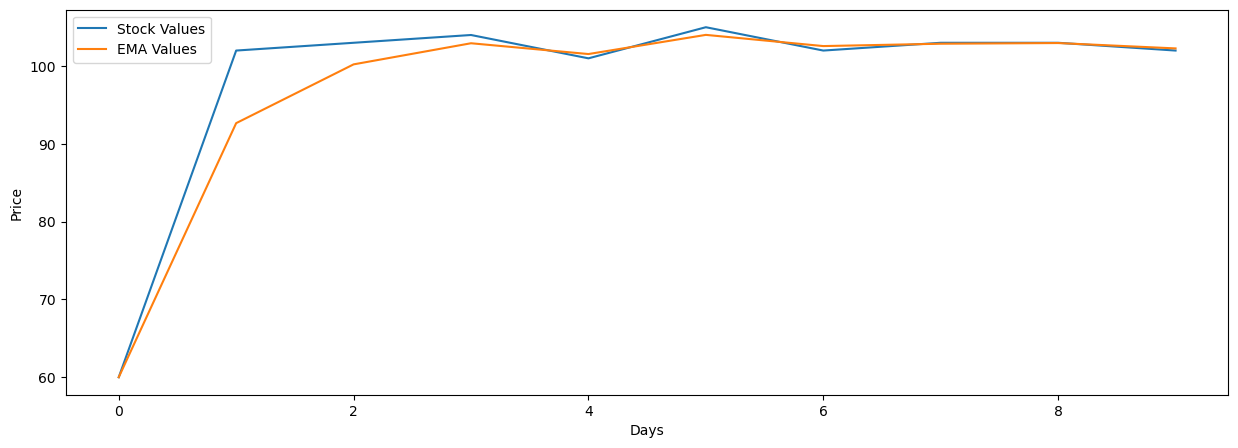

In [24]:
# create a dataframe
stockValues = pd.DataFrame(
    {'Stock_Values': [60, 102, 103, 104, 101,
                      105, 102, 103, 103, 102]})

# finding EMA
# use any constant value that results in 
# good smoothened curve
ema = stockValues.ewm(com=0.4).mean()

# Comparison plot b/w stock values & EMA
plt.plot(stockValues, label="Stock Values")
plt.plot(ema, label="EMA Values")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

#### Imputing the Missing Values

Here is the explanation of the techniques mentioned for handling missing values in time series data:
- **Mean Imputation**: Replaces missing values with the average of the entire column. Simple and fast, but may not capture trends or local variations.
- **Median Imputation**: Replaces missing values with the median of the entire column. Less sensitive to outliers than mean, but still lacks local context.
- **Last Observation Carried Forward (LOCF)**: Replaces missing values with the last known value. Works well for data with rising or constant trends, but can distort trends if they change direction.
- **Next Observation Carried Backward (NOCB)**: Replaces missing values with the next known value. Similar to LOCF but for downward trends. Both LOCF and NOCB can introduce artificial jumps or dips.
- **Linear Interpolation**
- **Spline Interpolation**

#### Outlier detection
(Check separate notebook)

#### Scaling
done with StandardScalar method , 
```from sklearn.preprocessing import StandardScaler```

Examples of Algorithms where Feature Scaling matters 
1. K-Means uses the Euclidean distance measure here feature scaling matters. 
2. K-Nearest-Neighbors also require feature scaling. 
3. Principal Component Analysis (PCA): Tries to get the feature with maximum variance, here too feature scaling is required. 
4. Gradient Descent: Calculation speed increase as Theta calculation becomes faster after feature scaling.

Note: Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling. 
In Short, any Algorithm which is Not Distance-based is Not affected by Feature Scaling.

#### Normalization
to normalize data between -1 and 1 for techniques like k-means, SVM and neural networks. Methods used are max absolute scaling, min-max feature scaling and z-score method

#### Time Series Analysis & Decomposition

Time Series Analysis and Decomposition is a systematic approach to studying sequential data collected over successive time intervals. It involves analyzing the data to understand its underlying patterns, trends, and seasonal variations, as well as decomposing the time series into its fundamental components. This decomposition typically includes identifying and isolating elements such as trend, seasonality, and residual (error) components within the data.
Different Time Series Analysis & Decomposition Techniques
1. Autocorrelation Analysis: A statistical method to measure the correlation between a time series and a lagged version of itself at different time lags. It helps identify patterns and dependencies within the time series data.
2. Partial Autocorrelation Functions (PACF): PACF measures the correlation between a time series and its lagged values, controlling for intermediate lags, aiding in identifying direct relationships between variables.
3. Trend Analysis: The process of identifying and analyzing the long-term movement or directionality of a time series. Trends can be linear, exponential, or nonlinear and are crucial for understanding underlying patterns and making forecasts.
3. Seasonality Analysis: Seasonality refers to periodic fluctuations or patterns that occur in a time series at fixed intervals, such as daily, weekly, or yearly. Seasonality analysis involves identifying and quantifying these recurring patterns to understand their impact on the data.
4. Decomposition: Decomposition separates a time series into its constituent components, typically trend, seasonality, and residual (error). This technique helps isolate and analyze each component individually, making it easier to understand and model the underlying patterns.
5. Spectrum Analysis: Spectrum analysis involves examining the frequency domain representation of a time series to identify dominant frequencies or periodicities. It helps detect cyclic patterns and understand the underlying periodic behavior of the data.
6. Seasonal and Trend decomposition using Loess: STL decomposes a time series into three components: seasonal, trend, and residual. This decomposition enables modeling and forecasting each component separately, simplifying the forecasting process.
7. Rolling Correlation: Rolling correlation calculates the correlation coefficient between two time series over a rolling window of observations, capturing changes in the relationship between variables over time.
8. Cross-correlation Analysis: Cross-correlation analysis measures the similarity between two time series by computing their correlation at different time lags. It is used to identify relationships and dependencies between different variables or time series.
9. Box-Jenkins Method: Box-Jenkins Method is a systematic approach for analyzing and modeling time series data. It involves identifying the appropriate autoregressive integrated moving average (ARIMA) model parameters, estimating the model, diagnosing its adequacy through residual analysis, and selecting the best-fitting model.
10. Granger Causality Analysis: Granger causality analysis determines whether one time series can predict future values of another time series. It helps infer causal relationships between variables in time series data, providing insights into the direction of influence.

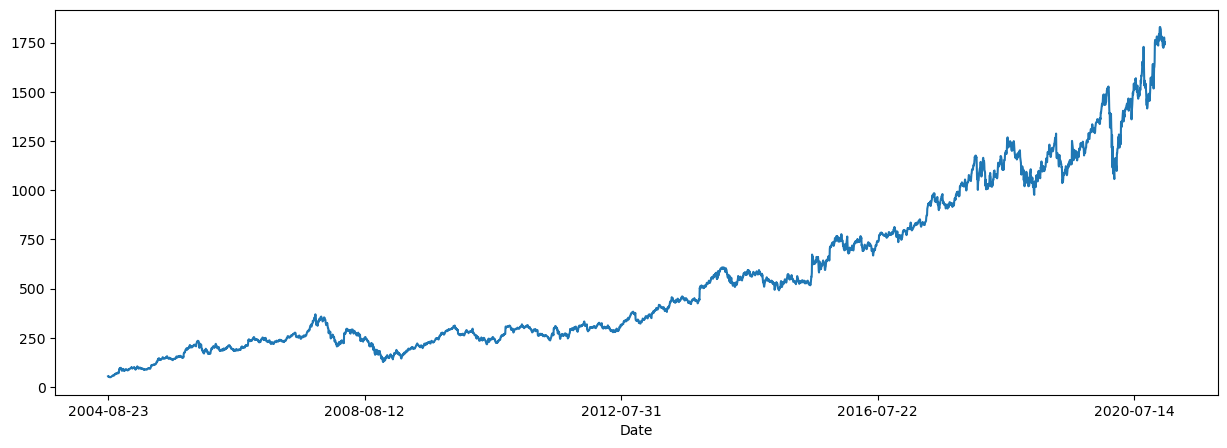

In [ ]:
# Importing necessary dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf

goog_stock_Data = pd.read_csv('GOOG.csv', header=0, index_col=0)
goog_stock_Data['Adj Close'].plot()
plt.show()

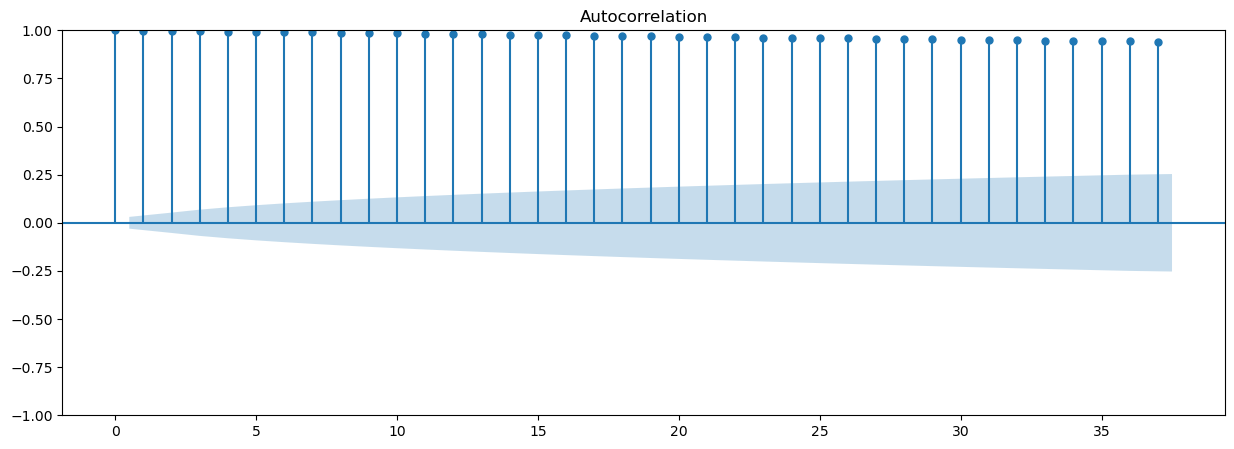

In [28]:
# Plot the autocorrelation for stock price data with 0.05 significance level
plot_acf(goog_stock_Data['Adj Close'], alpha =0.05)
plt.show()

In [29]:
#Code for Durbin Watson test
df = pd.DataFrame(goog_stock_Data,columns=['Date','Adj Close'])
X =np.arange(len(df[['Adj Close']]))
Y = np.asarray(df[['Adj Close']])
X = sm.add_constant(X)

# Fit the ordinary least square method.
ols_res = OLS(Y,X).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

0.005457204740184295

#### Seasonality
already discussed above

### Box-Jenkins Methodology for ARIMA Models

The Box-Jenkins methodology is a systematic approach for identifying, fitting, and checking ARIMA models for time series forecasting. ARIMA stands for AutoRegressive Integrated Moving Average and is widely used for modeling and predicting time series data. The methodology involves three main steps:

1. **Model Identification**: Analyze the time series data to determine if it is stationary. If not, apply differencing to make it stationary. Use plots like ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to identify the order of AR (p), I (d), and MA (q) components.
2. **Parameter Estimation**: Estimate the parameters of the ARIMA model using statistical techniques.
3. **Model Checking**: Diagnose the fitted model by analyzing the residuals to ensure they resemble white noise. If not, refine the model.

The page explains how to use Python's `statsmodels` library to implement the Box-Jenkins methodology, including steps for stationarity testing, plotting ACF/PACF, fitting ARIMA models, and forecasting.

**In summary:**  
The Box-Jenkins methodology guides you through identifying, fitting, and validating ARIMA models for time series forecasting. The process involves making the data stationary, using ACF/PACF plots to select model parameters, fitting the ARIMA model, and validating the results with residual analysis and forecasting.

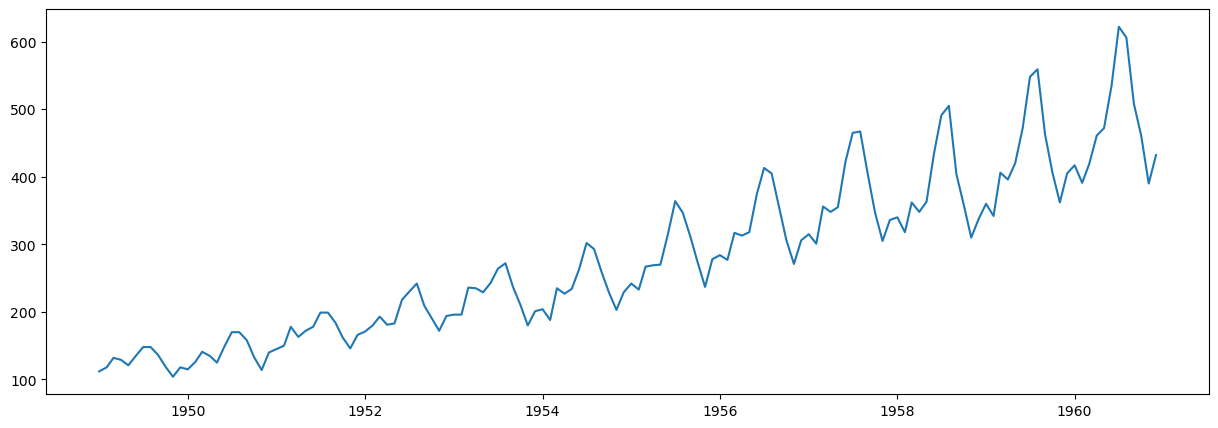

ADF Statistic: 0.8153688792060547
p-value: 0.9918802434376411


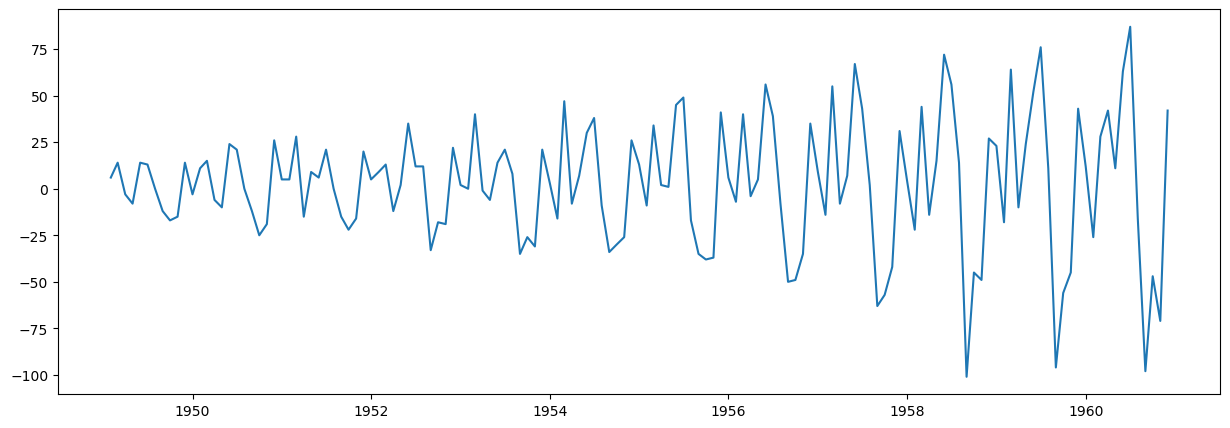

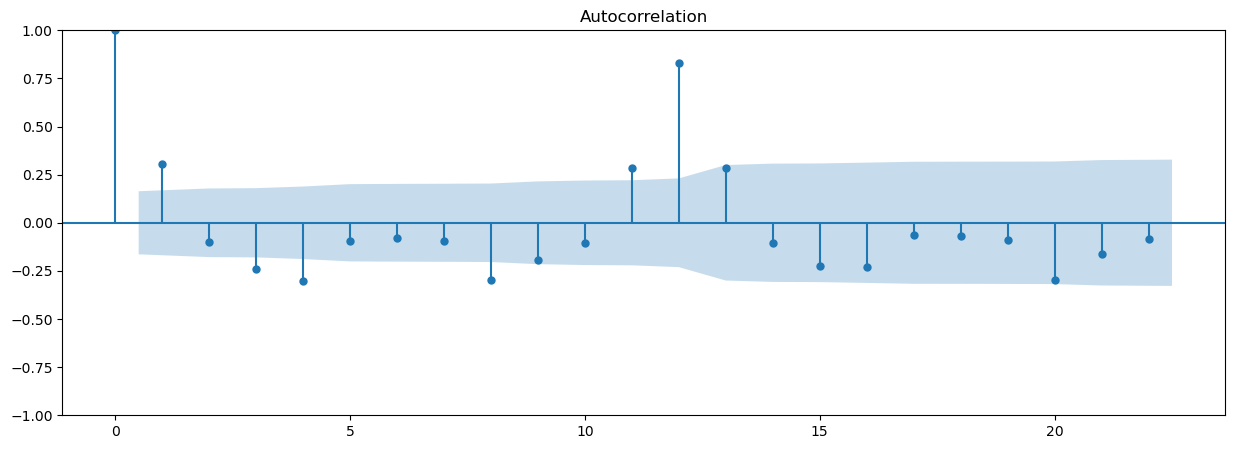

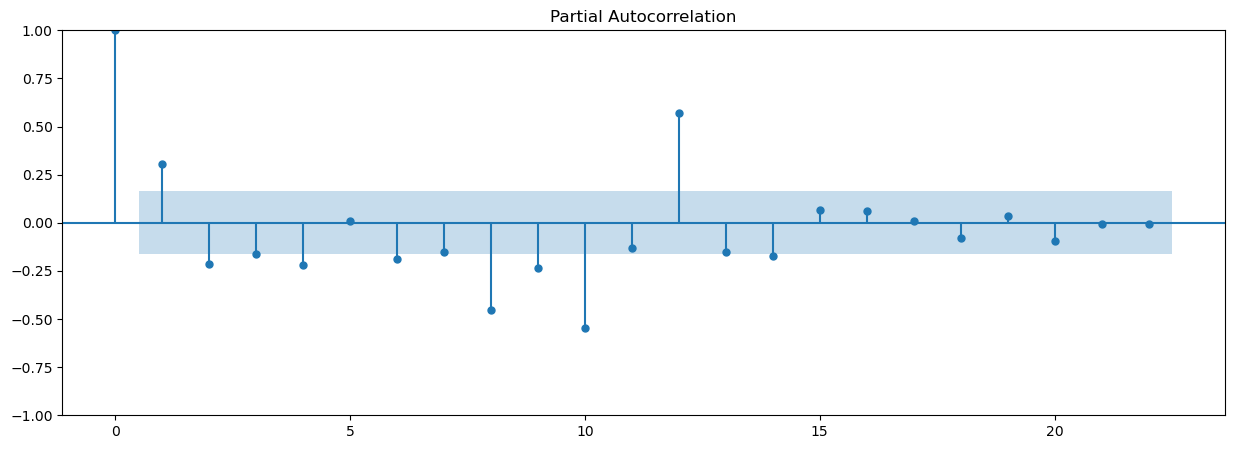

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 05 Aug 2025   AIC                           1394.683
Time:                        14:01:19   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
data = pd.read_csv('AirPassengers/AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot the time series
plt.plot(data)
plt.show()

# Test for stationarity
result = adfuller(data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if not stationary
data_diff = data['#Passengers'].diff().dropna()
plt.plot(data_diff)
plt.show()

# Plot ACF and PACF
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()

# Fit ARIMA model
model = ARIMA(data['#Passengers'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=12)
print(forecast)